<a href="https://colab.research.google.com/github/vijaynadimpalli/MelbourneHousingDataAnalysis/blob/main/MelbourneDataAnalysisNEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tensorflow import keras
%matplotlib inline

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
zip = zipfile.ZipFile('/content/drive/My Drive/NEW_DATASCIENCE_PROJECTS/Udemy Data Science & ML/TensorFlow_FILES.zip')
zip.extractall()
df = pd.read_csv('/content/TensorFlow_FILES/DATA/melb_data.csv')
pd.set_option('display.max_columns',500)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
df.drop(['Suburb','Address','CouncilArea','SellerG'],axis=1,inplace=True)

In [ ]:
df['Price'] = df['Price'].apply(np.log)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(12.611537753638338, 0, '0.01')

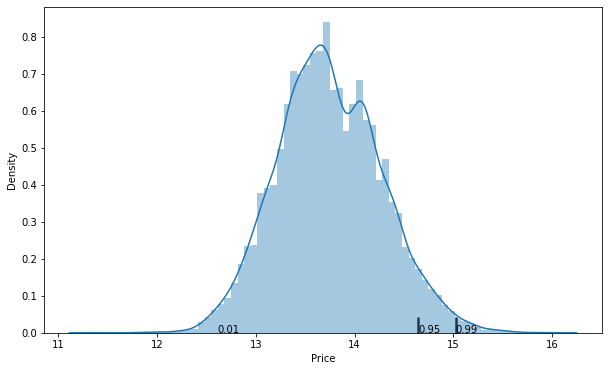

In [ ]:
#Figuring out percentiles on the price dist
plt.figure(figsize=(10,6))
ax = sns.distplot(df['Price'],bins=70)
percentile_95 = df['Price'].sort_values().reset_index(drop=True).iloc[int(df['Price'].shape[0]*0.95)]
percentile_99 = df['Price'].sort_values().reset_index(drop=True).iloc[int(df['Price'].shape[0]*0.99)]
percentile_01 = df['Price'].sort_values().reset_index(drop=True).iloc[int(df['Price'].shape[0]*0.01)]

sns.scatterplot(ax=ax,x=[percentile_95,percentile_99],y=[0,0],s=1000, color=".1", marker="|")
ax.text(percentile_95,0,s="0.95",fontsize=10)
ax.text(percentile_99,0,s="0.99",fontsize=10)
ax.text(percentile_01,0,s="0.01",fontsize=10)

In [ ]:
# #removing the top 1% of data
# df.sort_values(by='Price',inplace=True)
# df.reset_index(drop=True,inplace=True)
# df = df[(df['Price']>percentile_01) & (df['Price']<=percentile_99)]
# df.reset_index(drop=True,inplace=True)
# df

In [ ]:
#look into converting data to logarithmic.....

#this dataset is very different to the one in kaggle

#maybe first do the steps on this and add the other data later

In [ ]:
df['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [ ]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.559824,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.559824,1.000000,-0.153938,0.092621,0.536716,0.455706,0.256591,0.033582,0.096447,-0.361881,-0.224606,0.240917,-0.063999
Distance,0.294203,-0.153938,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.092621,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.536716,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.455706,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.256591,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.033582,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.096447,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.361881,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


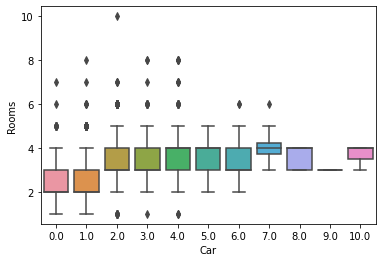

In [ ]:
sns.boxplot(df['Car'],df['Rooms'])

In [ ]:
#we can try grouping prices to high low ,etc to find mean and fill

In [ ]:
df.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
df.drop(df[df['Car'].isna()==True].index,inplace=True)
df.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


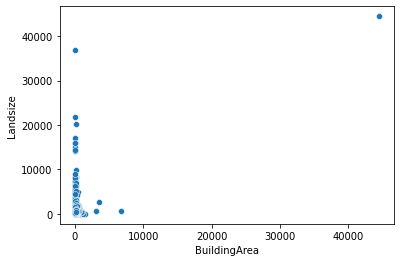

In [ ]:
sns.scatterplot(df['BuildingArea'],df['Landsize'])

In [ ]:
df.drop(df[df['BuildingArea']>1000].index,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


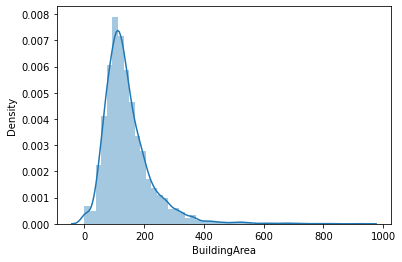

In [ ]:
sns.distplot(df['BuildingArea'])

In [ ]:
df['BuildingArea'].isna().sum()

6417

In [ ]:
df.drop(df[df['Landsize']>10000].index,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


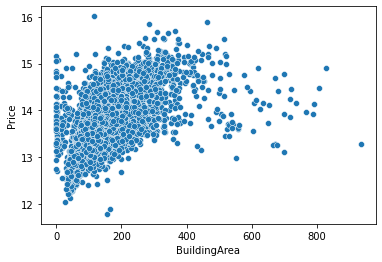

In [ ]:
sns.scatterplot(df['BuildingArea'],df['Price'])

In [ ]:
df[df['BuildingArea'].isna()==True].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,0.0,1337.000000,6401.000000,6401.000000,6401.000000
mean,2.896579,13.751232,10.144009,3105.910483,2.877050,1.461490,1.608186,496.559913,NaN,1967.060583,-37.810559,144.999205,7478.964693
std,0.937545,0.510129,5.646793,88.525782,0.959674,0.651532,0.982132,538.995243,NaN,33.962798,0.078349,0.102138,4412.754035
min,1.000000,11.350407,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,NaN,1850.000000,-38.182550,144.431810,249.000000
25%,2.000000,13.407542,6.200000,3046.000000,2.000000,1.000000,1.000000,192.000000,NaN,1950.000000,-37.857100,144.934980,4380.000000
50%,3.000000,13.726679,9.400000,3087.000000,3.000000,1.000000,2.000000,478.000000,NaN,1970.000000,-37.802200,145.004200,6567.000000
75%,3.000000,14.096923,13.000000,3148.000000,3.000000,2.000000,2.000000,662.000000,NaN,1997.000000,-37.755470,145.060900,10331.000000
max,10.000000,15.573368,47.300000,3977.000000,20.000000,8.000000,10.000000,8680.000000,NaN,2017.000000,-37.500870,145.453760,21650.000000


In [ ]:
df[df['BuildingArea'].isna()==False].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,6817.000000,7084.000000,7084.000000,7084.000000
mean,2.979673,13.738099,10.166728,3104.279644,2.952851,1.600932,1.611237,460.201581,143.516635,1964.433035,-37.808090,144.991856,7431.536138
std,0.971068,0.541904,5.991446,91.834151,0.971589,0.720883,0.944555,555.190277,83.166690,37.685437,0.080133,0.105124,4346.768563
min,1.000000,11.782953,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,13.353475,6.100000,3044.000000,2.000000,1.000000,1.000000,165.000000,93.000000,1940.000000,-37.856962,144.925360,4385.000000
50%,3.000000,13.699538,9.200000,3083.000000,3.000000,1.000000,2.000000,400.500000,126.000000,1970.000000,-37.802300,144.997050,6567.000000
75%,4.000000,14.100877,13.000000,3148.000000,4.000000,2.000000,2.000000,638.000000,174.000000,2000.000000,-37.756600,145.056325,10175.000000
max,8.000000,16.012735,47.400000,3977.000000,9.000000,8.000000,10.000000,9838.000000,934.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
#removing the edge cases of builing area changed corr completely....
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.561346,0.292305,0.054287,0.944068,0.593880,0.407937,0.192713,0.638030,-0.065595,0.014625,0.101248,-0.080316
Price,0.561346,1.000000,-0.153354,0.092144,0.538148,0.457097,0.256232,0.131636,0.561718,-0.358695,-0.224728,0.241987,-0.063235
Distance,0.292305,-0.153354,1.000000,0.429296,0.293996,0.125379,0.261471,0.157529,0.183256,0.243981,-0.139593,0.244226,-0.052710
Postcode,0.054287,0.092144,0.429296,1.000000,0.059483,0.112622,0.047999,0.044556,0.088242,0.034419,-0.412514,0.449086,0.064614
Bedroom2,0.944068,0.538148,0.293996,0.059483,1.000000,0.585600,0.404632,0.188868,0.623707,-0.053746,0.014658,0.102788,-0.079984
Bathroom,0.593880,0.457097,0.125379,0.112622,0.585600,1.000000,0.322163,0.112665,0.583765,0.151606,-0.072318,0.120236,-0.051337
Car,0.407937,0.256232,0.261471,0.047999,0.404632,0.322163,1.000000,0.186540,0.354840,0.105097,-0.003629,0.064546,-0.023573
Landsize,0.192713,0.131636,0.157529,0.044556,0.188868,0.112665,0.186540,1.000000,0.173747,0.019512,0.001798,0.080676,-0.018759
BuildingArea,0.638030,0.561718,0.183256,0.088242,0.623707,0.583765,0.354840,0.173747,1.000000,0.032412,-0.052318,0.117703,-0.068971
YearBuilt,-0.065595,-0.358695,0.243981,0.034419,-0.053746,0.151606,0.105097,0.019512,0.032412,1.000000,0.059571,-0.003664,0.004962


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


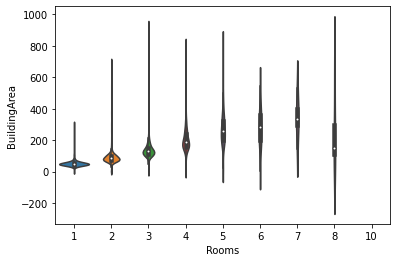

In [ ]:
sns.violinplot(df['Rooms'],df['BuildingArea'])
#So, as rooms increases building area increases....

In [ ]:
mean_rooms = df.groupby(by='Rooms')['BuildingArea'].mean()


#So to analyse building area firstly we tried to plot it... removed edge cases...weak corr with landsize ... removec edge cases there...
#then looked at maybe any reason for missing data i.e missingness...
#then looked at corr plots again and voila.. good relationship with rooms

In [ ]:
df['BuildingArea'] = df.apply(lambda x:mean_rooms[x['Rooms']] if np.isnan(x['BuildingArea']) else x['BuildingArea'],axis=1)

In [ ]:
df.drop(df[df['BuildingArea'].isna()].index,inplace=True)

In [ ]:
df.drop(df[df['YearBuilt']<1850].index,inplace=True)

In [ ]:
df.corr()['YearBuilt']

Rooms           -0.068957
Price           -0.367615
Distance         0.252083
Postcode         0.036504
Bedroom2        -0.056667
Bathroom         0.153171
Car              0.114497
Landsize         0.023724
BuildingArea     0.009988
YearBuilt        1.000000
Lattitude        0.059189
Longtitude      -0.000646
Propertycount    0.008256
Name: YearBuilt, dtype: float64

In [ ]:
df.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5331
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


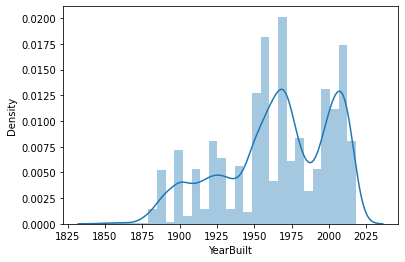

In [ ]:
sns.distplot(df['YearBuilt'])

So, dist is pretty meaningless and no real correlation from corr, now look at missingness of data and plot some relations with other features... maybe we can get something useful....

http://www.stat.columbia.edu/~gelman/arm/missing.pdf

Important link about the missingness of data and how to clean missing data....

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


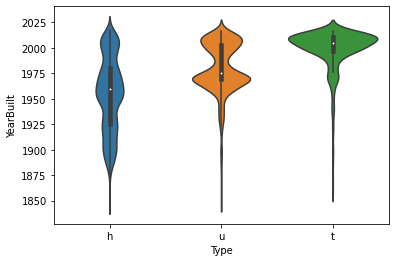

In [ ]:
sns.violinplot(df['Type'],df['YearBuilt'])

intersting that t's are pretty recent...

In [ ]:
df[df['YearBuilt'].isna()==False]['Type'].value_counts()

h    5371
u    2019
t     761
Name: Type, dtype: int64

In [ ]:
df[df['YearBuilt'].isna()]['Type'].value_counts()

h    4002
u     979
t     350
Name: Type, dtype: int64

In [ ]:
#okay so i guess classify price and take median and give it to year built...

In [ ]:
stdp = np.mean(df['Price']) + np.std(df['Price'])
stdm = np.mean(df['Price']) - np.std(df['Price'])
df['PriceClass'] = df.apply(lambda x: 'u' if x['Price'] > stdp else ('d' if x['Price'] < stdm else 'm'),axis=1)

In [ ]:
priceclass_median = df.groupby(by='PriceClass')['YearBuilt'].median()
priceclass_median['u']

1935.0

In [ ]:
df['YearBuilt'] = df.apply(lambda x: priceclass_median[x['PriceClass']] if np.isnan(x['YearBuilt'])  else x['YearBuilt'],axis = 1)

So divided the price into classes and used the median of that class to fill year built values.....

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13482 entries, 0 to 13517
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13482 non-null  int64  
 1   Type           13482 non-null  object 
 2   Price          13482 non-null  float64
 3   Method         13482 non-null  object 
 4   Date           13482 non-null  object 
 5   Distance       13482 non-null  float64
 6   Postcode       13482 non-null  float64
 7   Bedroom2       13482 non-null  float64
 8   Bathroom       13482 non-null  float64
 9   Car            13482 non-null  float64
 10  Landsize       13482 non-null  float64
 11  BuildingArea   13482 non-null  float64
 12  YearBuilt      13482 non-null  float64
 13  Lattitude      13482 non-null  float64
 14  Longtitude     13482 non-null  float64
 15  Regionname     13482 non-null  object 
 16  Propertycount  13482 non-null  float64
 17  PriceClass     13482 non-null  object 
dtypes: flo

In [ ]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.562532,0.292645,0.054500,0.943839,0.594016,0.408600,0.193736,0.742618,-0.112117,0.013985,0.101141,-0.080885
Price,0.562532,1.000000,-0.153412,0.092123,0.539267,0.457226,0.256204,0.131764,0.536901,-0.406760,-0.224714,0.241964,-0.063295
Distance,0.292645,-0.153412,1.000000,0.429282,0.294333,0.125321,0.261357,0.158116,0.213341,0.215532,-0.139604,0.244180,-0.052877
Postcode,0.054500,0.092123,0.429282,1.000000,0.059705,0.112689,0.047909,0.044704,0.069720,0.008337,-0.412502,0.449088,0.064563
Bedroom2,0.943839,0.539267,0.294333,0.059705,1.000000,0.585711,0.405274,0.189861,0.709958,-0.100374,0.014023,0.102682,-0.080548
Bathroom,0.594016,0.457226,0.125321,0.112689,0.585711,1.000000,0.322354,0.113105,0.574391,0.059703,-0.072572,0.120245,-0.051411
Car,0.408600,0.256204,0.261357,0.047909,0.405274,0.322354,1.000000,0.186829,0.355043,0.051549,-0.003528,0.064321,-0.023880
Landsize,0.193736,0.131764,0.158116,0.044704,0.189861,0.113105,0.186829,1.000000,0.175035,0.001532,0.001840,0.080733,-0.018605
BuildingArea,0.742618,0.536901,0.213341,0.069720,0.709958,0.574391,0.355043,0.175035,1.000000,-0.039582,-0.028554,0.113148,-0.064207
YearBuilt,-0.112117,-0.406760,0.215532,0.008337,-0.100374,0.059703,0.051549,0.001532,-0.039582,1.000000,0.073854,-0.028491,0.009429


In [ ]:
df.drop(['Postcode','PriceClass'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Type'],drop_first=True),pd.get_dummies(df['Method'],drop_first=True),
                pd.get_dummies(df['Regionname'],drop_first=True)],axis=1)

In [ ]:
df.drop(['Type','Method','Regionname'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13482 entries, 0 to 13517
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       13482 non-null  int64  
 1   Price                       13482 non-null  float64
 2   Date                        13482 non-null  object 
 3   Distance                    13482 non-null  float64
 4   Bedroom2                    13482 non-null  float64
 5   Bathroom                    13482 non-null  float64
 6   Car                         13482 non-null  float64
 7   Landsize                    13482 non-null  float64
 8   BuildingArea                13482 non-null  float64
 9   YearBuilt                   13482 non-null  float64
 10  Lattitude                   13482 non-null  float64
 11  Longtitude                  13482 non-null  float64
 12  Propertycount               13482 non-null  float64
 13  t                           134

In [ ]:
df.head()

,Rooms,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,t,u,S,SA,SP,VB,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,14.207553,3/12/2016,2.5,2.0,1.0,1.0,202.0,89.628209,1970.0,-37.7996,144.9984,4019.0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2,13.849912,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.000000,1900.0,-37.8079,144.9934,4019.0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3,14.197366,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.000000,1900.0,-37.8093,144.9944,4019.0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,3,13.652992,4/03/2017,2.5,3.0,2.0,1.0,94.0,138.917240,1970.0,-37.7969,144.9969,4019.0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,14.285514,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.000000,2014.0,-37.8072,144.9941,4019.0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
df['MonthSold'] = pd.to_datetime(df['Date']).apply(lambda x:x.month)
df['YearSold'] = pd.to_datetime(df['Date']).apply(lambda x:x.year)
df.drop(['Date'],axis=1,inplace=True)

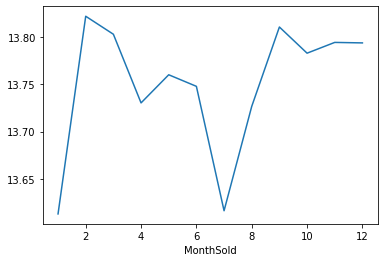

In [ ]:
df.groupby(by='MonthSold')['Price'].mean().plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13482 entries, 0 to 13517
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       13482 non-null  int64  
 1   Price                       13482 non-null  float64
 2   Distance                    13482 non-null  float64
 3   Bedroom2                    13482 non-null  float64
 4   Bathroom                    13482 non-null  float64
 5   Car                         13482 non-null  float64
 6   Landsize                    13482 non-null  float64
 7   BuildingArea                13482 non-null  float64
 8   YearBuilt                   13482 non-null  float64
 9   Lattitude                   13482 non-null  float64
 10  Longtitude                  13482 non-null  float64
 11  Propertycount               13482 non-null  float64
 12  t                           13482 non-null  uint8  
 13  u                           134

In [ ]:
#Starting modelling part

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = df['Price'].values
X = df.drop('Price',axis=1).values

In [ ]:
y=np.expand_dims(y,axis=1)

In [ ]:
print(X.shape)
print(y.shape)

(13482, 26)
(13482, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=101)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(2697, 26)
(10785, 26)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBRT = GradientBoostingRegressor(max_depth=2, n_estimators=120)
GBRT.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
         for y_pred in GBRT.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

GBRT_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
GBRT_best.fit(X_train, y_train)
y_pred = GBRT_best.predict(X_test)

# Display
print('Gradient Boosting Regressor')
print('\nR-squared training set:')
print(GBRT_best.score(X_train, y_train))

print('\nR-squared test set:')
print(GBRT_best.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor

R-squared training set:
0.8455370779034975

R-squared test set:
0.8344085658169982


In [ ]:
# def build_model1(learning_rate=0.01):
#   model = Sequential()
#   model.add(Dense(27,activation='relu'))
#   model.add(Dense(27,activation='relu'))
#   model.add(Dense(27,activation='relu'))
#   model.add(Dense(27,activation='relu'))
#   model.add(Dense(20,activation='relu'))
#   model.add(Dense(20,activation='relu'))
#   model.add(Dense(20,activation='relu'))
#   model.add(Dense(20,activation='relu'))
#   model.add(Dense(20,activation='relu'))
#   model.add(Dense(20,activation='relu'))
#   model.add(Dense(15,activation='relu'))
#   model.add(Dense(15,activation='relu'))
#   model.add(Dense(15,activation='relu'))
#   model.add(Dense(15,activation='relu'))
#   model.add(Dense(15,activation='relu'))
#   model.add(Dense(15,activation='relu'))
#   model.add(Dense(10,activation='relu'))
#   model.add(Dense(10,activation='relu'))
#   model.add(Dense(10,activation='relu'))
#   model.add(Dense(10,activation='relu'))
#   model.add(Dense(10,activation='relu'))
#   model.add(Dense(10,activation='relu'))
#   model.add(Dense(1,activation='linear'))

#   adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
#   model.compile(loss='mse',optimizer=adam_opt)

#   return model


# def run_model(model,batch_size=32,epochs=50): 
#   output = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)
#   return output

# def pred_model(model):
#   y_predt = model.predict(X_train)
#   y_pred = model.predict(X_test)
#   print("Mean absolute error on train data : " + str(mean_absolute_error(y_train,y_predt)/np.mean(y_train)))
#   print("Mean absolute error on test data : " + str( mean_absolute_error(y_test,y_pred)/np.mean(y_test)))
#   print("r2_score on train data : " + str(r2_score(y_train,y_predt)))
#   print("r2_score on test data : " + str(r2_score(y_test,y_pred)))
#   print("Explained variance score : " + str(explained_variance_score(y_test,y_pred)))

In [ ]:
import tensorflow as tf
def r2(labels,predictions):
  unexplained_error = tf.reduce_sum(tf.square(labels - predictions))
  total_error = tf.reduce_sum(tf.square(labels - tf.reduce_mean(labels, axis=0)))
  R2 = 1. - tf.compat.v1.div(unexplained_error, total_error)

  return R2


def build_model1(learning_rate=0.001):
  model = Sequential()
  model.add(Dense(20,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))

  adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=adam_opt,metrics=[r2])

  return model


def run_model(model,batch_size=32,epochs=50):
  #lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6*(10**(epoch/100)))

  output = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,callbacks=[])
  return output

def pred_model(model):
  y_predt = model.predict(X_train)
  y_pred = model.predict(X_test)
  print("Mean absolute error on train data : " + str(mean_absolute_error(y_train,y_predt)/np.mean(y_train)))
  print("Mean absolute error on test data : " + str( mean_absolute_error(y_test,y_pred)/np.mean(y_test)))
  print("r2_score on train data : " + str(r2_score(y_train,y_predt)))
  print("r2_score on test data : " + str(r2_score(y_test,y_pred)))
  print("Explained variance score : " + str(explained_variance_score(y_test,y_pred)))

Epoch 1/500
169/169 [==============================] - 1s 5ms/step - loss: 144.6906 - r2: -540.0861 - val_loss: 6.1621 - val_r2: -22.3835
Epoch 2/500
169/169 [==============================] - 0s 1ms/step - loss: 3.0460 - r2: -10.5112 - val_loss: 2.1617 - val_r2: -7.3095
Epoch 3/500
169/169 [==============================] - 0s 2ms/step - loss: 1.8236 - r2: -5.8576 - val_loss: 1.5194 - val_r2: -4.8174
Epoch 4/500
169/169 [==============================] - 0s 1ms/step - loss: 1.3772 - r2: -4.1531 - val_loss: 1.2051 - val_r2: -3.5904
Epoch 5/500
169/169 [==============================] - 0s 2ms/step - loss: 1.0838 - r2: -3.0918 - val_loss: 0.9427 - val_r2: -2.5771
Epoch 6/500
169/169 [==============================] - 0s 1ms/step - loss: 0.8243 - r2: -2.0993 - val_loss: 0.7564 - val_r2: -1.8579
Epoch 7/500
169/169 [==============================] - 0s 2ms/step - loss: 0.6021 - r2: -1.2708 - val_loss: 0.5098 - val_r2: -0.9244
Epoch 8/500
169/169 [==============================] - 0s 1ms/s

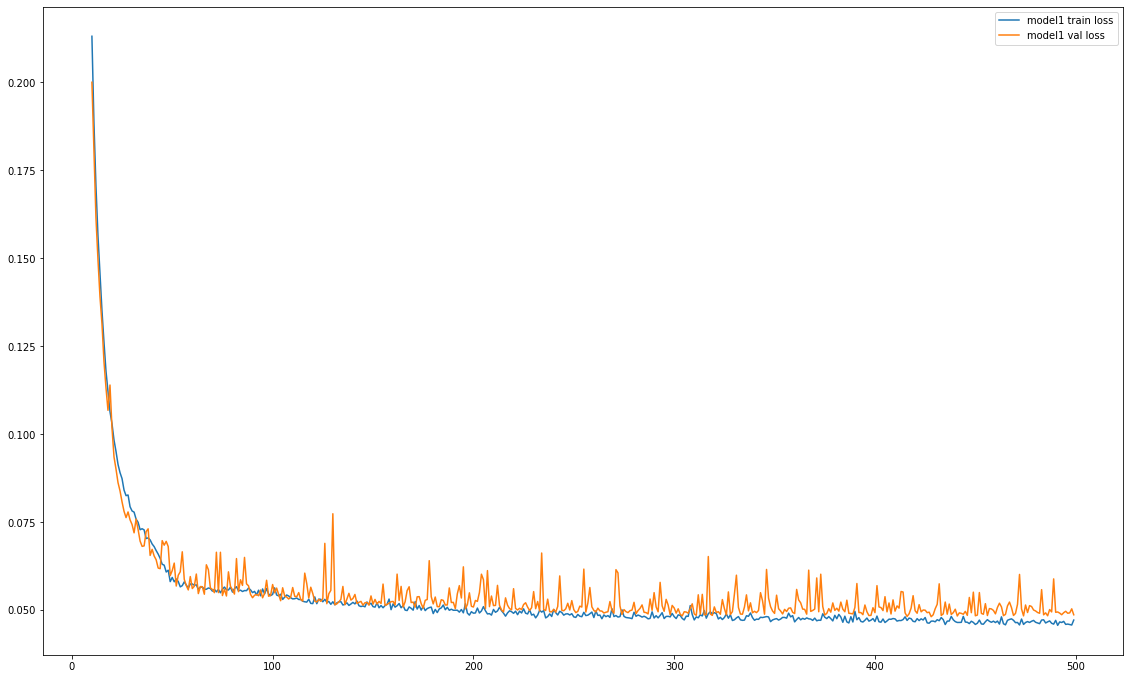

In [ ]:
model1 = build_model1(1e-3)

output1 = pd.DataFrame(run_model(model1,64,500).history)

#plt.semilogx(output1['lr'][10:],output1['val_loss'][10:])


fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0,0,1,1])
ax.plot(output1['loss'][10:],label='model1 train loss')
ax.plot(output1['val_loss'][10:],label='model1 val loss')

ax.legend()

pred_model(model1)

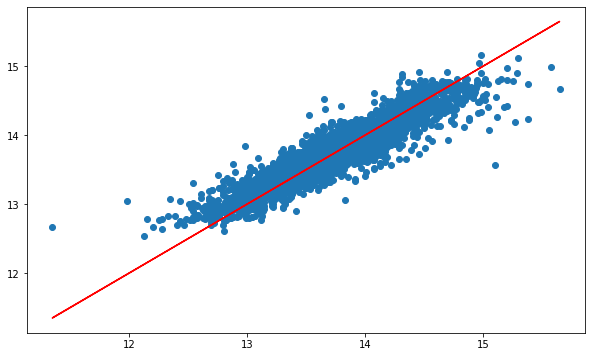

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

#good results, next step is to tune hyperparameters and do feature importance to give some features greater weights...also deep learning seems overkill
#next convert this model to functional API and use Model() class....